In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X , y = load_diabetes(return_X_y = True)

In [3]:
X[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [4]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                       test_size = 0.2,
                                                       random_state = 0)

In [6]:
reg = LinearRegression()
reg.fit(X_train , y_train)

LinearRegression()

In [7]:
print(reg.coef_)
print(reg.intercept_)

[ -35.55025079 -243.16508959  562.76234744  305.46348218 -662.70290089
  324.20738537   24.74879489  170.3249615   731.63743545   43.0309307 ]
152.5380470138517


In [8]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.3322332173106184

In [9]:
class SGDRegressor:
  def __init__(self, learning_rate=0.01, epochs=100):
    self.coef_ = None
    self.intercept_ = None
    self.lr = learning_rate
    self.epochs = epochs
    self.l = []
    self.e = []

  def fit(self, X_train, y_train):
    self.intercept_ = 0
    self.coef_ = np.ones(X_train.shape[1])

    for i in range(self.epochs):
      for j in range(X_train.shape[0]):
        idx = np.random.randint(0,X_train.shape[0])

        # Calculating y_hat
        y_hat = np.dot(X_train[idx] , self.coef_) + self.intercept_
        intercept_der = -2 * (y_train[idx] - y_hat)
        self.intercept_ = self.intercept_ - (self.lr * intercept_der)

        # Calculating coef_
        coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
        self.coef_ = self.coef_ - (self.lr * coef_der)

        self.l.append(self.intercept_)
        self.e.append(i)



    plt.plot(self.e,self.l)
    plt.xlabel("Epochs")
    plt.ylabel("LR")
    plt.show()
    # print(self.intercept_ , self.coef_)

  def predict(self, X_test):
    return np.dot(X_test, self.coef_) + self.intercept_


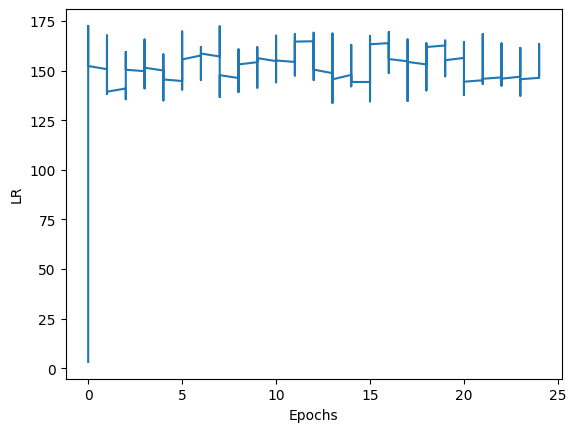

Time Taken is  0.45334935188293457 s


In [10]:
import time
start = time.time()
sgd = SGDRegressor(learning_rate = 0.01 , epochs =25)
sgd.fit(X_train, y_train)
print(f"Time Taken is ",time.time() - start,"s")

In [11]:
y_pred = sgd.predict(X_test)
r2_score(y_test,y_pred)

0.33216565194210046

# **SKLEARN SGDRressor**

In [13]:
from sklearn.linear_model import SGDRegressor

sk_sgd = SGDRegressor()
sk_sgd.fit(X_train,y_train)
y_pred = sk_sgd.predict(X_test)
r2_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.34163048047833955